<a href="https://colab.research.google.com/github/lazarogibert/Repositorio/blob/main/Prediccion_eich_trabajo_de_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=a77f6b44c6e9f90046df5160813db626891f28421c7fbdb92670e00ae9c00aed
  Stored in directory: /root/.cache/pip/wheels/fe/60/a8/447c66eae887b085b3e112358a5fa837104b6cd0d9de41ca71
Successfully built fitter


#Importando las bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
from fitter import Fitter, get_common_distributions
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import multiprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Informacion sobre el dataset

**El conjunto de datos describe pacientes pediátricos con varias enfermedades hematológicas: trastornos malignos (p. ej., leucemia linfoblástica aguda, leucemia mielógena aguda, leucemia mielógena crónica, síndrome mielodisplásico) y casos no malignos (p. ej., anemia aplásica grave, anemia de Fanconi, con adrenoleucodistrofia ligada al cromosoma X). Todos los pacientes se sometieron al trasplante de células madre hematopoyéticas de un donante alogénico no emparentado.**

E**l objetivo del problema es predecir la variable acute_GvHD_II_III_IV que indica si el paciente sufre de la Enfermedad de Injerto contra Huesped.**


Contenido:
El conjunto contiene 187 ejemplos caracterizados por 37 atributos. El significado de las características es el siguiente:


1-donor_age - Age of the donor at the time of hematopoietic stem cells apheresis

2-donoragebelow_35 - Is donor age less than 35 (yes, no)

3-donor_ABO - ABO blood group of the donor of hematopoietic stem cells (0, A, B, AB)

4-donor_CMV - Presence of cytomegalovirus infection in the donor of hematopoietic stem cells prior to transplantation (present, absent)

5-recipient_age - Age of the recipient of hematopoietic stem cells at the time of transplantation

6-recipientagebelow_10 - Is recipient age below 10 (yes, no)

7-recipientageint - Age of the recipient discretized to intervals (0,5], (5, 10], (10, 20]

8-recipient_gender - Gender of the recipient (female, male)

9-recipientbodymass - Body mass of the recipient of hematopoietic stem cells at the time of the transplantation

10-recipient_ABO - ABO blood group of the recipient of hematopoietic stem cells (0, A, B ,AB)

11-recipient_rh - Presence of the Rh factor on recipient’s red blood cells (plus ,minus)

12-recipient_CMV - Presence of cytomegalovirus infection in the donor of hematopoietic stem cells prior to transplantation (present, absent)

13-disease - Type of disease (ALL, AML, chronic, nonmalignant, lymphoma)

14-disease_group - Type of disease (malignant, nonmalignant)

15-gender_match - Compatibility of the donor and recipient according to their gender (female to male, other)

16-ABO_match - Compatibility of the donor and the recipient of hematopoietic stem cells according to ABO blood group (matched, mismatched)

17-CMV_status - Serological compatibility of the donor and the recipient of hematopoietic stem cells according to cytomegalovirus infection prior to transplantation (the higher the value the lower the compatibility)

18-HLA_match - Compatibility of antigens of the main histocompatibility complex of the donor and the recipient of hematopoietic stem cells (10/10, 9/10, 8/10, 7/10)

19-HLA_mismatch - HLA matched or mismatched

20-antigen - In how many antigens there is a difference between the donor nad the recipient (0-3)

21-allel - In how many allele there is a difference between the donor nad the recipient (0-4)

22-HLAgroup1 - The difference type between the donor and the recipient (HLA matched, one antigen, one allel, DRB1 cell, two allele or allel+antigen, two antigenes+allel, mismatched)

23-risk_group - Risk group (high, low)

24-stemcellsource - Source of hematopoietic stem cells (peripheral blood, bone marrow)

25-txpostrelapse - The second bone marrow transplantation after relapse (yes ,no)

26-CD34x1e6per_kg - CD34kgx10d6 - CD34+ cell dose per kg of recipient body weight (10^6/kg)

27-CD3x1e8per_kg - CD3+ cell dose per kg of recipient body weight (10^8/kg)

28-CD3toCD34_ratio - CD3+ cell to CD34+ cell ratio

29-ANC_recovery - Time to neutrophils recovery defined as neutrophils count >0.5 x 10^9/L

30-PLT_recovery - Time to platelet recovery defined as platelet count >50000/mm3

31-acuteGvHDIIIIIIV - Development of acute graft versus host disease stage II or III or IV (yes, no)

32-acuteGvHDIII_IV - Development of acute graft versus host disease stage III or IV (yes, no)

33-timetoacuteGvHDIII_IV - Time to development of acute graft versus host disease stage III or IV

34-extensivechronicGvHD - Development of extensive chronic graft versus host disease (yes, no)

35-relapse - Relapse of the disease (yes, no)

36-survival_time - Time of observation (if alive) or time to event (if dead) in days

37-survival_status - Survival status (0 - alive, 1 - dead)


# Cargando el dataset

In [ ]:
data = arff.loadarff(open('/content/sample_data/bone-marrow.arff', encoding="utf-8"))
df = pd.DataFrame(data[0])
# code to fix the problem with encoding of the file
tmp_df = df.select_dtypes([object])
tmp_df = tmp_df.stack().str.decode("utf-8").unstack()
for col in tmp_df:
    df[col] = tmp_df[col]
df =df.replace({'?': None})
df.head()


,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,...,1.338760,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,...,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,...,19.013230,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,...,29.481647,23.0,29.0,yes,yes,19.0,None,no,53.0,1
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,...,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0


# Analisis exploratorio

## Tipo de cada columna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  185 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        185 non-null    float64
 9   recipient_ABO              186 non-null    object 
 10  recipient_rh               185 non-null    object 
 11  recipient_CMV              173 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

In [ ]:

df['survival_status']=df['survival_status'].astype('int')


In [ ]:
cleanup_nums = {"acute_GvHD_II_III_IV": {"yes":1, "no":0}}
df =df.replace(cleanup_nums)

print(df['acute_GvHD_II_III_IV'])

0      1
1      1
2      1
3      1
4      0
      ..
182    1
183    0
184    1
185    1
186    1
Name: acute_GvHD_II_III_IV, Length: 187, dtype: int64


## Número de observaciones y valores ausentes  

In [ ]:
df.shape

(187, 37)

In [ ]:
df.isnull().sum().sort_values()

donor_age                     0
relapse                       0
time_to_acute_GvHD_III_IV     0
acute_GvHD_III_IV             0
acute_GvHD_II_III_IV          0
PLT_recovery                  0
ANC_recovery                  0
CD34_x1e6_per_kg              0
tx_post_relapse               0
stem_cell_source              0
risk_group                    0
HLA_group_1                   0
survival_time                 0
HLA_match                     0
HLA_mismatch                  0
recipient_gender              0
donor_age_below_35            0
donor_ABO                     0
recipient_age                 0
recipient_age_below_10        0
recipient_age_int             0
gender_match                  0
survival_status               0
disease                       0
disease_group                 0
recipient_ABO                 1
allel                         1
antigen                       1
ABO_match                     1
recipient_body_mass           2
donor_CMV                     2
recipien

In [ ]:
df[df.isnull().any(axis=1)]

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,...,29.481647,23.0,29.0,1,yes,19.0,None,no,53.0,1
5,27.391781,yes,AB,None,8.9,yes,5_10,male,40.0,0,...,8.412758,16.0,70.0,0,no,1000000.0,no,no,2800.0,0
6,34.520548,yes,0,absent,14.4,no,10_20,female,51.0,A,...,2.406248,17.0,29.0,1,yes,18.0,None,no,41.0,1
7,21.435616,yes,0,present,18.2,no,10_20,male,56.0,A,...,NaN,22.0,58.0,1,yes,22.0,None,no,45.0,1
16,40.232877,no,AB,present,17.9,no,10_20,male,97.8,0,...,1.595133,11.0,16.0,1,no,1000000.0,None,no,58.0,1
18,43.375342,no,0,absent,0.6,yes,0_5,female,6.0,A,...,1.408646,24.0,74.0,1,no,1000000.0,no,no,704.0,0
27,39.983562,no,A,absent,4.7,yes,0_5,male,17.0,B,...,3.242425,16.0,1000000.0,1,yes,16.0,None,no,35.0,1
30,24.731507,yes,A,absent,8.6,yes,5_10,female,20.0,B,...,2.380569,14.0,18.0,1,no,1000000.0,no,no,676.0,0
32,39.024658,no,0,absent,3.1,yes,0_5,male,15.0,B,...,16.186239,13.0,23.0,1,yes,36.0,None,no,96.0,1
41,20.471233,yes,A,absent,3.1,yes,0_5,male,15.0,B,...,2.335954,17.0,1000000.0,1,no,1000000.0,None,no,28.0,1


## Comprobando la distribucion de las clases.

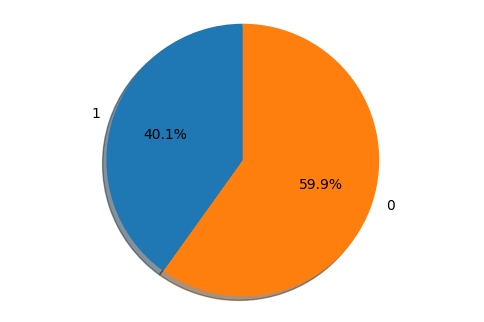

In [ ]:
#Decision class distribution
groups = df['acute_GvHD_II_III_IV'].value_counts()
sizes = [groups[0], groups[1]]
labels = list(map(lambda e: str(e), groups.index))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Aqui se puede observar que contamos con clases balanceadas.

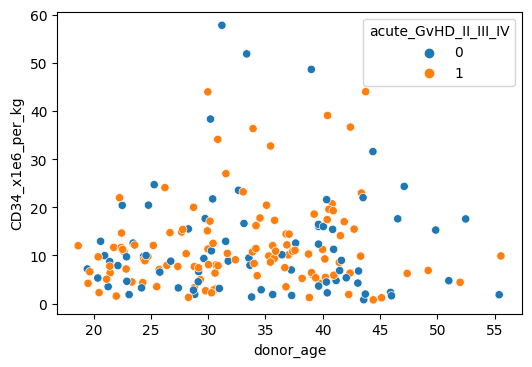

In [ ]:
sns.scatterplot(data=df, x="donor_age",y="CD34_x1e6_per_kg",hue="acute_GvHD_II_III_IV" )

Visualizamos la distribucion de algunos de los datos teniendo en cuenta la variable objetivo.

# Variable objetivo

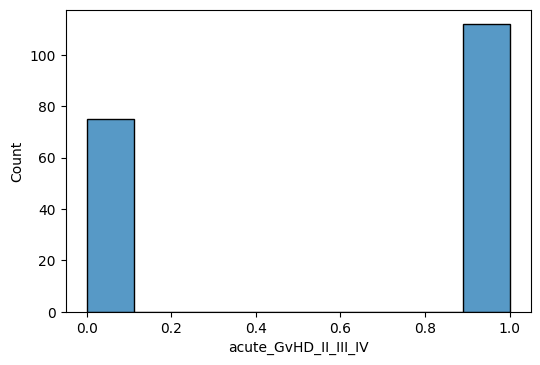

In [ ]:

sns.histplot(data=df,x='acute_GvHD_II_III_IV')


Podemos observar la distribucion de la variable objetivo.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

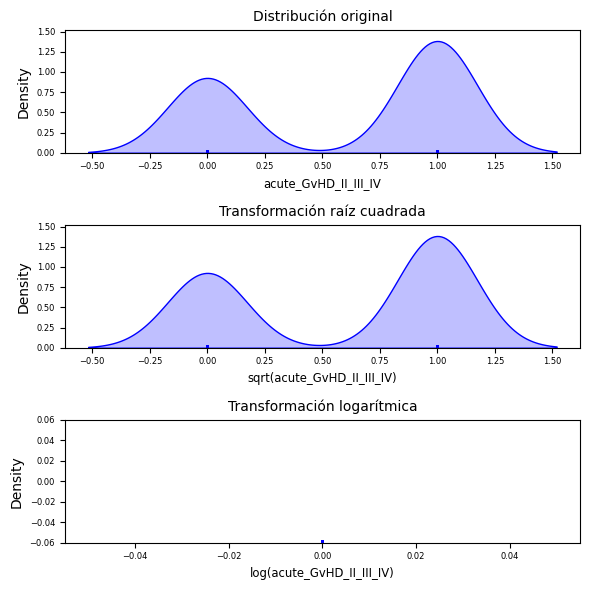

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    df.acute_GvHD_II_III_IV,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('acute_GvHD_II_III_IV', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.acute_GvHD_II_III_IV),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(acute_GvHD_II_III_IV)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.acute_GvHD_II_III_IV),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(acute_GvHD_II_III_IV)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  7.15it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,4363.534429,150.062077,604.730056,inf,0.597673,2.396135e-64
exponpow,4561.234793,147.300711,613.016213,inf,0.440406,1.524742e-33
chi2,5081.355885,107.982004,633.209362,inf,0.401070,1.152081e-27
expon,5105.468981,68.442337,628.863546,inf,0.410616,4.953942e-29
norm,5142.100821,83.927086,630.200484,inf,0.392342,1.895651e-26
logistic,5142.645030,96.867234,630.220274,inf,0.358474,5.087303e-22
gamma,5143.630819,85.267102,635.487225,inf,0.393708,1.228662e-26
beta,5195.744803,6176.315590,642.603437,inf,0.576437,2.027227e-59
cauchy,5195.744803,9434.840406,632.141220,inf,0.500000,9.369332e-44


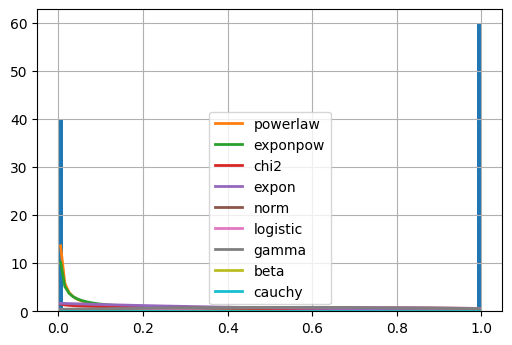

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df.acute_GvHD_II_III_IV, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=True)

# Eliminando filas con vacios

In [ ]:
df=df.dropna()
df.acute_GvHD_II_III_IV=df.acute_GvHD_II_III_IV.astype('int')
df[df.isnull().any(axis=1)]



/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status


In [ ]:
df.shape

(142, 37)

In [ ]:
print(df.acute_GvHD_II_III_IV)

0      1
1      1
2      1
4      0
8      0
      ..
179    1
182    1
183    0
184    1
185    1
Name: acute_GvHD_II_III_IV, Length: 142, dtype: int64


Como es un dataset medico el metodo de imputacion mas seguro para evitar la entrada de ruido al modelo es eliminar las filas con datos vacios.

# Variables numericas

In [ ]:
# convierto dos variables que implican cantidades y originalmente estan como string
cleanup_nums2 = {
               
                "antigen":{"0":0, "1":1, "2":2, "3":3},
                "allel":{"0":0, "1":1, "2":2, "3":3, "4":4}}
df = df.replace(cleanup_nums2)

In [ ]:
df.select_dtypes(include=['float', 'int']).describe()

,donor_age,recipient_age,recipient_body_mass,antigen,allel,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,time_to_acute_GvHD_III_IV,survival_time,survival_status
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,32.931082,9.458451,33.927465,0.936620,0.753521,12.609246,4.841408,5.015907,15.098592,21157.415493,0.612676,795781.401408,1141.021127,0.338028
std,8.007697,5.042982,17.984881,0.997975,0.876701,9.900743,3.693064,9.740032,2.839213,144311.424226,0.488863,404548.067037,816.815287,0.474713
min,18.646575,0.700000,6.400000,0.000000,0.000000,0.790000,0.040000,0.309048,10.000000,10.000000,0.000000,10.000000,68.000000,0.000000
25%,26.461644,4.925000,18.375000,0.000000,0.000000,6.425000,1.937500,1.831103,13.000000,15.000000,0.000000,1000000.000000,405.500000,0.000000
50%,31.708219,9.100000,30.250000,1.000000,1.000000,10.070000,4.465000,2.727613,15.000000,20.000000,1.000000,1000000.000000,1021.500000,0.000000
75%,40.267808,13.475000,48.950000,2.000000,1.000000,16.015000,6.785000,5.134882,17.000000,29.000000,1.000000,1000000.000000,1774.250000,1.000000
max,52.476712,20.200000,76.000000,3.000000,4.000000,57.780000,20.020000,99.560970,26.000000,1000000.000000,1.000000,1000000.000000,3364.000000,1.000000


## Gráficos de cada variable numérica

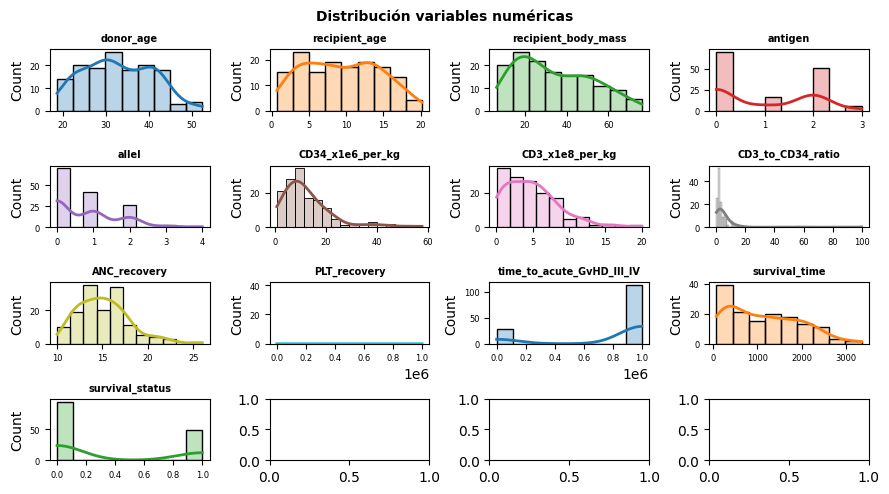

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float', 'int']).columns
columnas_numeric = columnas_numeric.drop('acute_GvHD_II_III_IV')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

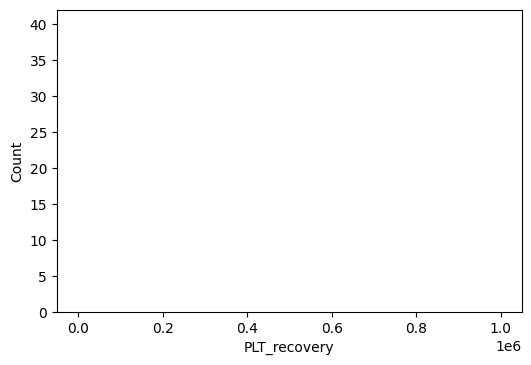

In [ ]:
sns.histplot(data=df, x="PLT_recovery")

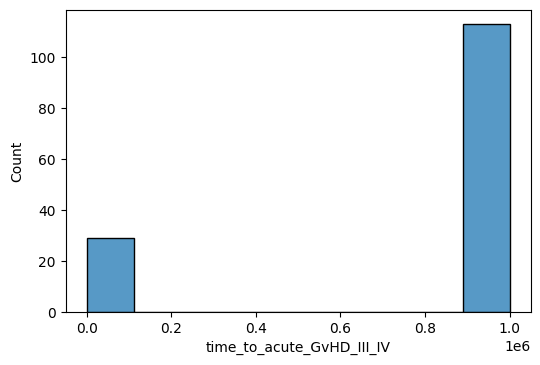

In [ ]:
sns.histplot(data=df, x="time_to_acute_GvHD_III_IV")

Podemos observar que las variables PLT_recovery y time_to_acute_GvHD_III_IV podrian traer problemas si las ignoramos

In [ ]:
df.PLT_recovery.value_counts()

14.0         15
21.0         10
16.0          9
17.0          8
13.0          8
24.0          7
19.0          6
12.0          6
15.0          6
20.0          6
25.0          4
18.0          4
11.0          4
37.0          4
1000000.0     3
32.0          3
51.0          3
29.0          3
27.0          3
23.0          3
33.0          2
30.0          2
22.0          2
44.0          1
46.0          1
91.0          1
28.0          1
42.0          1
26.0          1
247.0         1
111.0         1
74.0          1
107.0         1
170.0         1
119.0         1
79.0          1
10.0          1
72.0          1
285.0         1
112.0         1
66.0          1
88.0          1
48.0          1
100.0         1
Name: PLT_recovery, dtype: int64

In [ ]:
df.time_to_acute_GvHD_III_IV.value_counts()

1000000.0    113
21.0           3
18.0           3
14.0           2
11.0           2
32.0           1
55.0           1
16.0           1
51.0           1
10.0           1
27.0           1
42.0           1
33.0           1
100.0          1
99.0           1
19.0           1
58.0           1
26.0           1
24.0           1
49.0           1
62.0           1
15.0           1
20.0           1
54.0           1
Name: time_to_acute_GvHD_III_IV, dtype: int64

In [ ]:
df.PLT_recovery.dtype

dtype('float64')

Decido dejar las variables de la manera que estan ya que a pesar de que hay valores que se aparacen pocas veces hay variedad en los valores que toman.

## Analizando la correlacion de las variables numericas con la variable objetivo

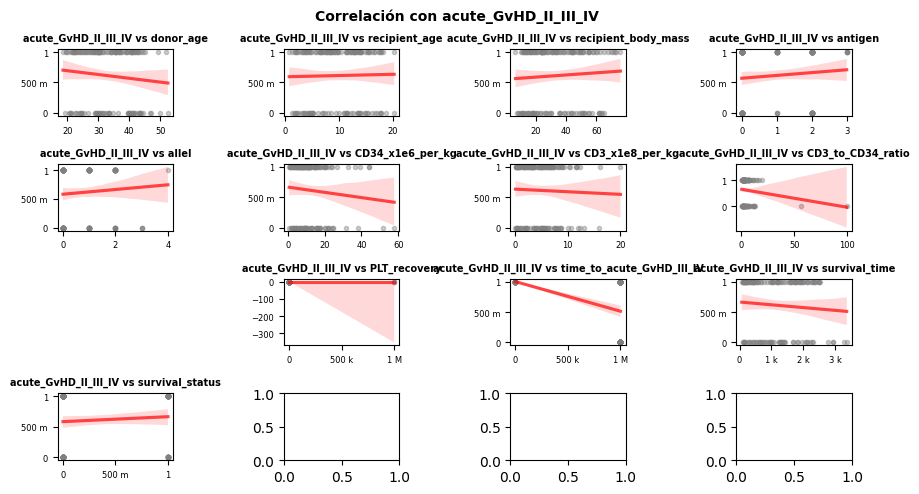

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('acute_GvHD_II_III_IV')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['acute_GvHD_II_III_IV'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"acute_GvHD_II_III_IV vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con acute_GvHD_II_III_IV', fontsize = 10, fontweight = "bold");

In [ ]:
col_corr=df.select_dtypes(include=['float64','int']).copy()
corr=col_corr.corr()['acute_GvHD_II_III_IV'].abs()
so = corr.sort_values(kind="quicksort")
print(so[-30:])

PLT_recovery                 0.016280
recipient_age                0.021043
CD3_x1e8_per_kg              0.032497
ANC_recovery                 0.037927
recipient_body_mass          0.064783
allel                        0.073533
survival_time                0.076565
survival_status              0.079199
CD34_x1e6_per_kg             0.087368
antigen                      0.094695
donor_age                    0.102441
CD3_to_CD34_ratio            0.137567
time_to_acute_GvHD_III_IV    0.402793
acute_GvHD_II_III_IV         1.000000
Name: acute_GvHD_II_III_IV, dtype: float64


Se peuede observar que las variable time_to_acute_GvHD_III_IV tiene una alta correlacion pero al no ser un dato que tendré en tiempo real se elimina más adelante.

## Observamos la correlacion entre las variables numericas

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
16,recipient_age,recipient_body_mass,0.912022,0.912022
29,recipient_body_mass,recipient_age,0.912022,0.912022
194,survival_status,survival_time,-0.704149,0.704149
181,survival_time,survival_status,-0.704149,0.704149
59,allel,antigen,0.679139,0.679139
46,antigen,allel,0.679139,0.679139
89,CD3_x1e8_per_kg,CD34_x1e6_per_kg,0.586730,0.586730
76,CD34_x1e6_per_kg,CD3_x1e8_per_kg,0.586730,0.586730
33,recipient_body_mass,CD34_x1e6_per_kg,-0.469248,0.469248
72,CD34_x1e6_per_kg,recipient_body_mass,-0.469248,0.469248


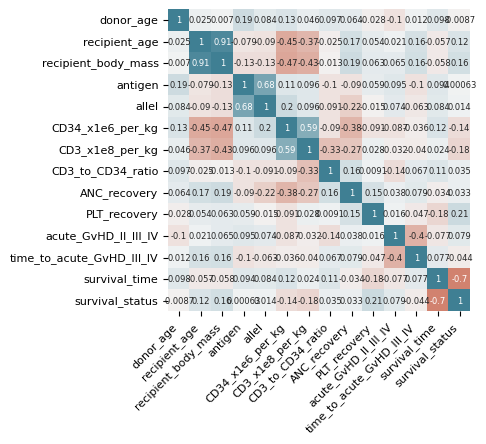

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [ ]:
df.select_dtypes(include=['object']).describe()

,donor_age_below_35,donor_ABO,donor_CMV,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_ABO,recipient_rh,recipient_CMV,disease,...,CMV_status,HLA_match,HLA_mismatch,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,acute_GvHD_III_IV,extensive_chronic_GvHD,relapse
count,142,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
unique,2,4,2,2,3,2,4,2,2,5,...,4,4,2,7,2,2,2,2,2,2
top,yes,A,absent,yes,10_20,male,A,plus,present,ALL,...,2,10/10,matched,matched,low,peripheral_blood,no,no,no,no
freq,84,55,85,78,65,87,55,118,83,53,...,46,70,121,70,90,116,125,114,119,117


# Variables cualitativas

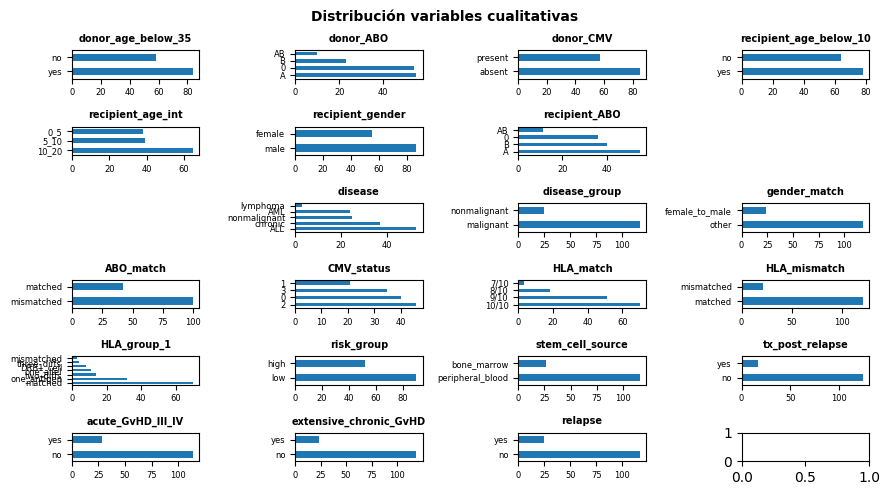

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

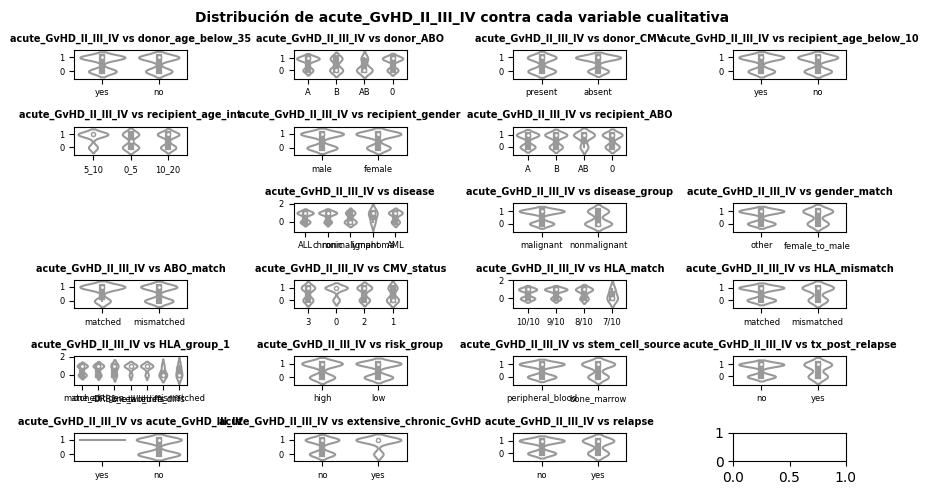

In [ ]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'acute_GvHD_II_III_IV',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"acute_GvHD_II_III_IV vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de acute_GvHD_II_III_IV contra cada variable cualitativa ', fontsize = 10, fontweight = "bold");

# Dividiendo en conjunto train y test

In [ ]:
X=df.drop(['survival_status', 'survival_time', 'acute_GvHD_II_III_IV','time_to_acute_GvHD_III_IV'], axis=1)
y=df.acute_GvHD_II_III_IV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16,stratify=y)

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    113.000000
mean       0.610619
std        0.489782
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: acute_GvHD_II_III_IV, dtype: float64


In [ ]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    29.000000
mean      0.620690
std       0.493804
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: acute_GvHD_II_III_IV, dtype: float64


# Randomforest classifier

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestClassifier())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

0.7241379310344828
              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.69      1.00      0.82        18

    accuracy                           0.72        29
   macro avg       0.85      0.64      0.62        29
weighted avg       0.81      0.72      0.67        29

[[ 3  8]
 [ 0 18]]


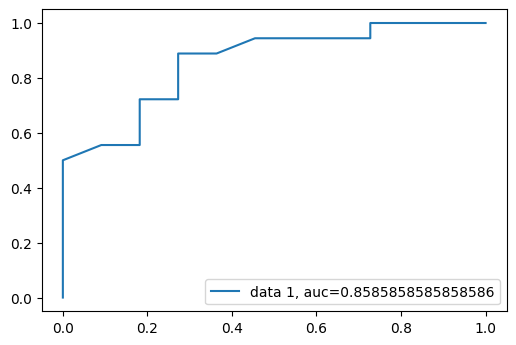

Text(0.5, 357.55555555555554, 'Predicted label')

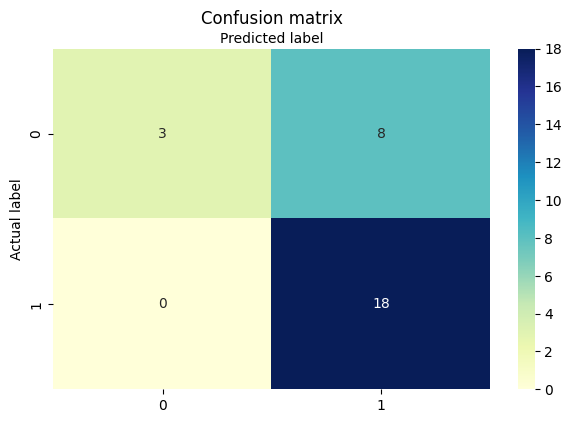

In [ ]:
y_pred = pipe.predict(X_test)
score=pipe.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Validacion

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'f1',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: 0.6699830065015823


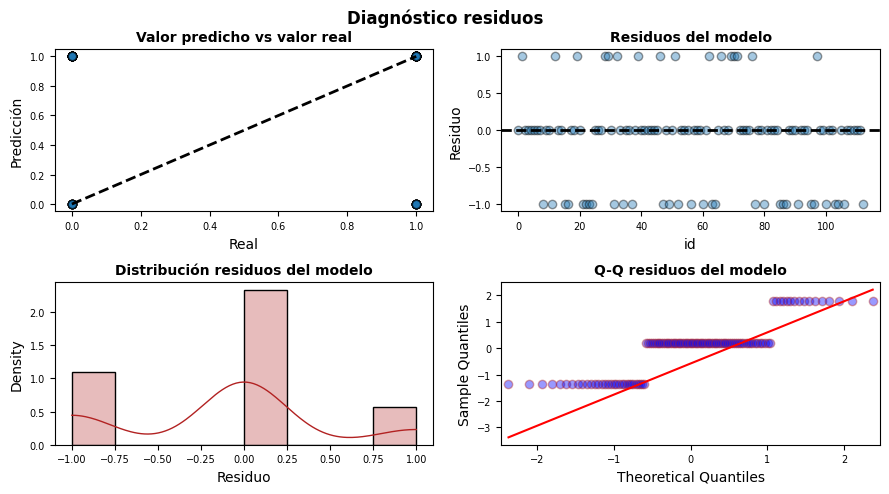

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('f1', 'accuracy'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,0.161901,0.026706,0.666667,1.0,0.552632,1.0
1,0.137647,0.019477,0.571429,1.0,0.447368,1.0
2,0.140321,0.018620,0.777778,1.0,0.675676,1.0
3,0.164852,0.018690,0.627451,1.0,0.500000,1.0
4,0.140322,0.017627,0.784314,1.0,0.710526,1.0
5,0.137939,0.017518,0.800000,1.0,0.702703,1.0
6,0.157295,0.022517,0.750000,1.0,0.631579,1.0
7,0.133222,0.017458,0.653061,1.0,0.552632,1.0
8,0.138668,0.018869,0.608696,1.0,0.513514,1.0
9,0.140262,0.019153,0.705882,1.0,0.605263,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


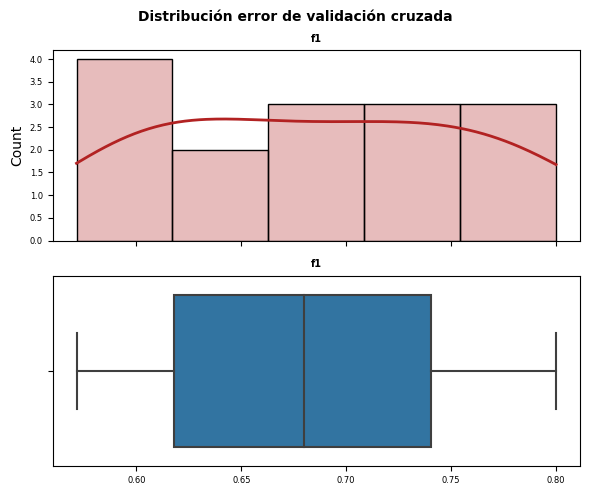

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_f1'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('f1', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_f1'],
    ax      = axes[1]
)
axes[1].set_title('f1', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

#Prediccion

In [ ]:
predicciones = pipe.predict(X_test)
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'acute_GvHD_II_III_IV' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,acute_GvHD_II_III_IV,prediccion
126,1,1
45,1,1
155,0,1
183,0,1
94,0,1


#Error de test

In [ ]:
# fbeta_score
# ==============================================================================
from sklearn.metrics import fbeta_score

fbeta = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )
fbeta

0.8796992481203009

# Hiperparametros(tunning)

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestClassifier())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [10, 30,50, 60, 75, 95],
    'modelo__max_features': ["auto", 3, 5, 7, 9, 12, 16, 20],
    'modelo__max_depth'   : [None, 3, 5, 10, 20, 30, 40]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'f1',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
17,75,7,10,0.717506,0.09562,1.0,0.0


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
fbeta_rf = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )

print(f"El error (fbeta) de test es: {fbeta_rf}")

El error (fbeta) de test es: 0.8565891472868217


# Probando otros modelos

## XGBoost

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', xgb.XGBClassifier())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

0.7241379310344828
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.73      0.89      0.80        18

    accuracy                           0.72        29
   macro avg       0.72      0.67      0.68        29
weighted avg       0.72      0.72      0.71        29

[[ 5  6]
 [ 2 16]]


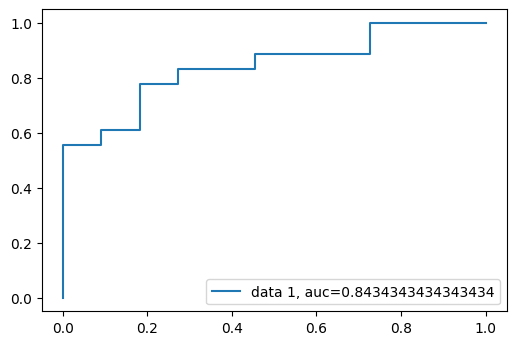

Text(0.5, 357.55555555555554, 'Predicted label')

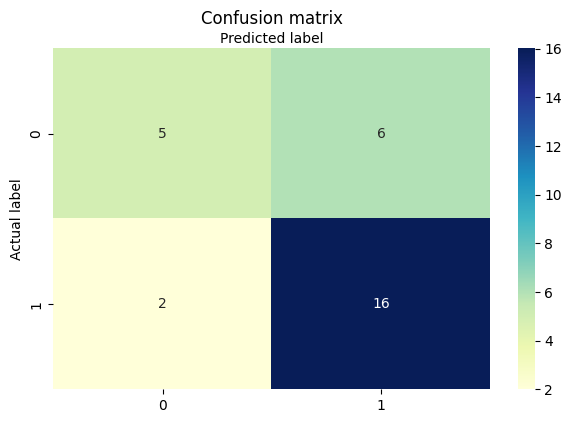

In [ ]:
y_pred = pipe.predict(X_test)
score=pipe.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Validacion

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'f1',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: 0.6331398549850562


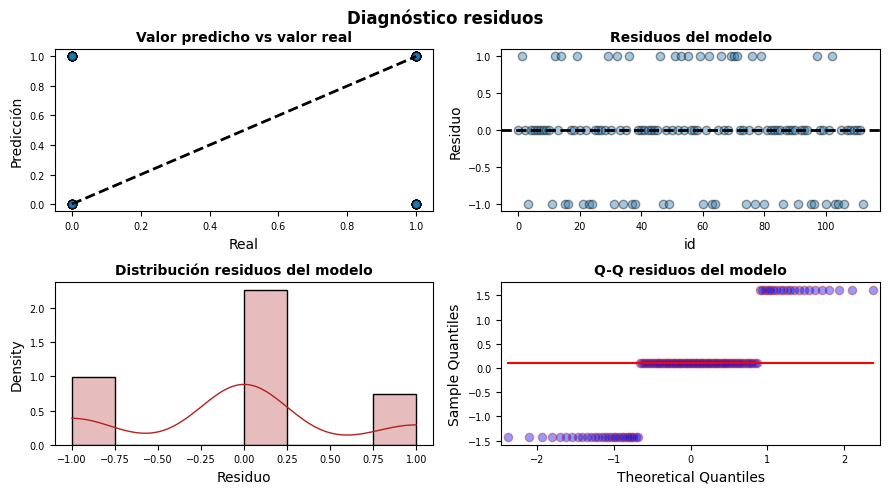

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('f1', 'accuracy'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,0.065273,0.011019,0.590909,1.000000,0.526316,1.000000
1,0.046024,0.010158,0.708333,1.000000,0.631579,1.000000
2,0.047033,0.015254,0.740741,1.000000,0.621622,1.000000
3,0.052314,0.016443,0.595745,1.000000,0.500000,1.000000
4,0.046527,0.010561,0.716981,1.000000,0.605263,1.000000
5,0.046137,0.011371,0.739130,1.000000,0.675676,1.000000
6,0.046139,0.010361,0.716981,1.000000,0.605263,1.000000
7,0.054074,0.010975,0.636364,1.000000,0.578947,1.000000
8,0.052958,0.010415,0.523810,1.000000,0.459459,1.000000
9,0.050903,0.010400,0.679245,1.000000,0.552632,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


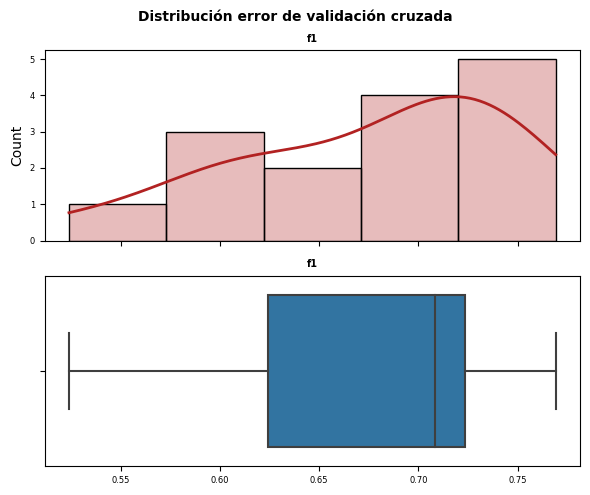

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_f1'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('f1', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_f1'],
    ax      = axes[1]
)
axes[1].set_title('f1', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

##Prediccion

In [ ]:
predicciones = pipe.predict(X_test)
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'acute_GvHD_II_III_IV' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,acute_GvHD_II_III_IV,prediccion
126,1,0
45,1,1
155,0,1
183,0,0
94,0,1


##Error de test

In [ ]:
# fbeta_score
# ==============================================================================
from sklearn.metrics import fbeta_score

fbeta = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )
fbeta

0.8320000000000002

## Gradient boosting classifier

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingClassifier())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

0.7241379310344828
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.73      0.89      0.80        18

    accuracy                           0.72        29
   macro avg       0.72      0.67      0.68        29
weighted avg       0.72      0.72      0.71        29

[[ 5  6]
 [ 2 16]]


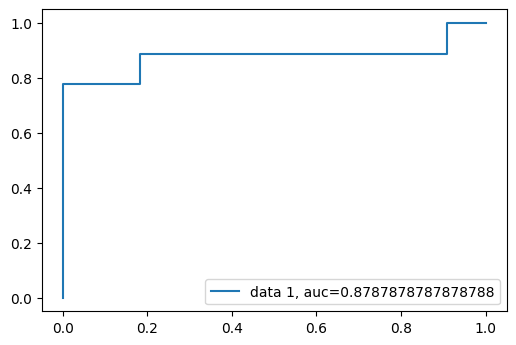

Text(0.5, 357.55555555555554, 'Predicted label')

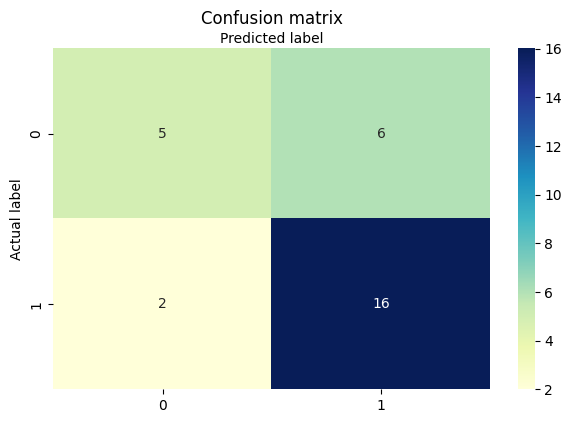

In [ ]:
y_pred = pipe.predict(X_test)
score=pipe.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Validacion

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'f1',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: 0.6491420634748808


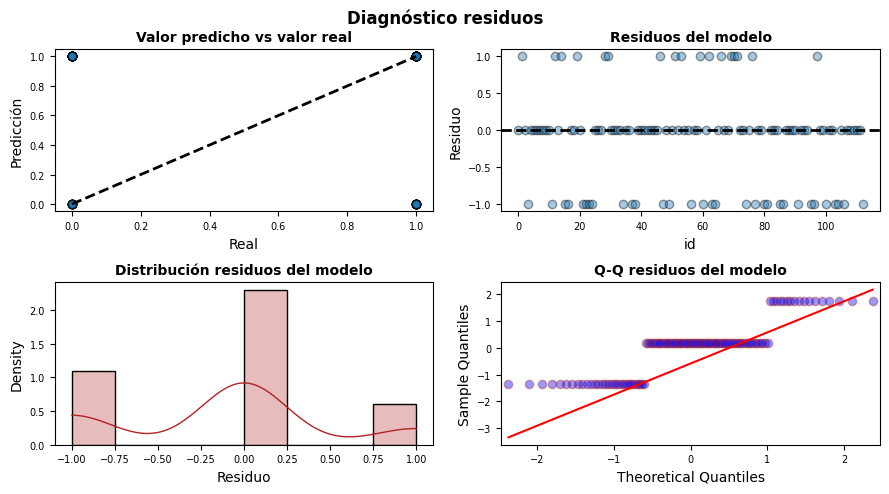

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('f1', 'accuracy'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,0.087822,0.009104,0.511628,1.0,0.447368,1.0
1,0.080767,0.008757,0.595745,1.0,0.500000,1.0
2,0.092735,0.008962,0.800000,1.0,0.702703,1.0
3,0.084648,0.009003,0.666667,1.0,0.552632,1.0
4,0.093837,0.009555,0.627451,1.0,0.500000,1.0
5,0.084946,0.009069,0.800000,1.0,0.729730,1.0
6,0.084233,0.010572,0.727273,1.0,0.605263,1.0
7,0.092240,0.010618,0.638298,1.0,0.552632,1.0
8,0.093258,0.015635,0.577778,1.0,0.486486,1.0
9,0.090610,0.011368,0.653061,1.0,0.552632,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


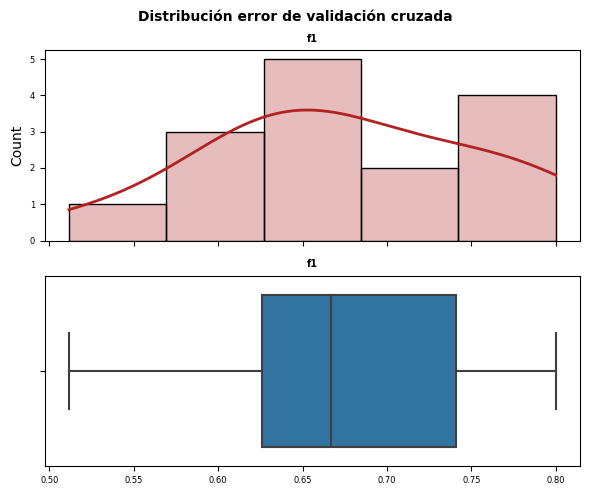

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_f1'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('f1', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_f1'],
    ax      = axes[1]
)
axes[1].set_title('f1', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

##Prediccion

In [ ]:
predicciones = pipe.predict(X_test)
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'acute_GvHD_II_III_IV' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,acute_GvHD_II_III_IV,prediccion
126,1,0
45,1,1
155,0,1
183,0,1
94,0,0


##Error de test

In [ ]:
# fbeta_score
# ==============================================================================
from sklearn.metrics import fbeta_score

fbeta = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )
fbeta

0.8320000000000002

## Logictic Regression

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', LogisticRegression())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

0.8275862068965517
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.81      0.94      0.87        18

    accuracy                           0.83        29
   macro avg       0.84      0.79      0.80        29
weighted avg       0.83      0.83      0.82        29

[[ 7  4]
 [ 1 17]]


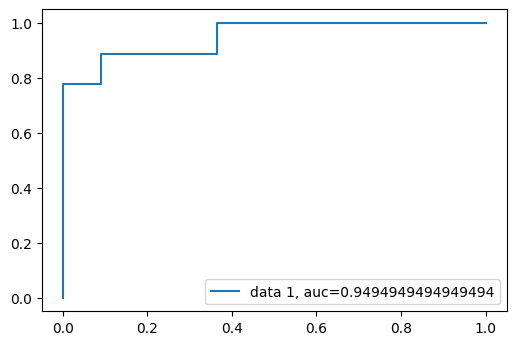

Text(0.5, 357.55555555555554, 'Predicted label')

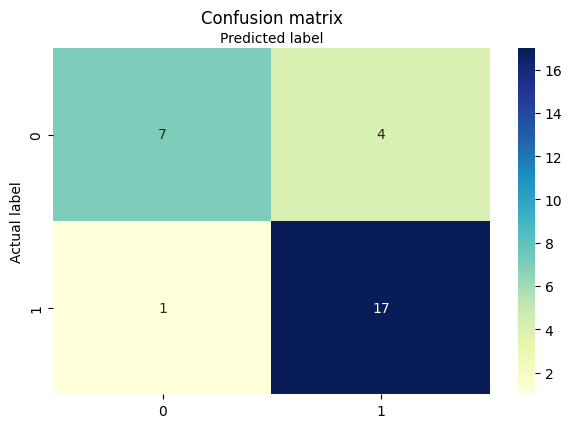

In [ ]:
y_pred = pipe.predict(X_test)
score=pipe.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Validacion

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'f1',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: 0.6457378502130825


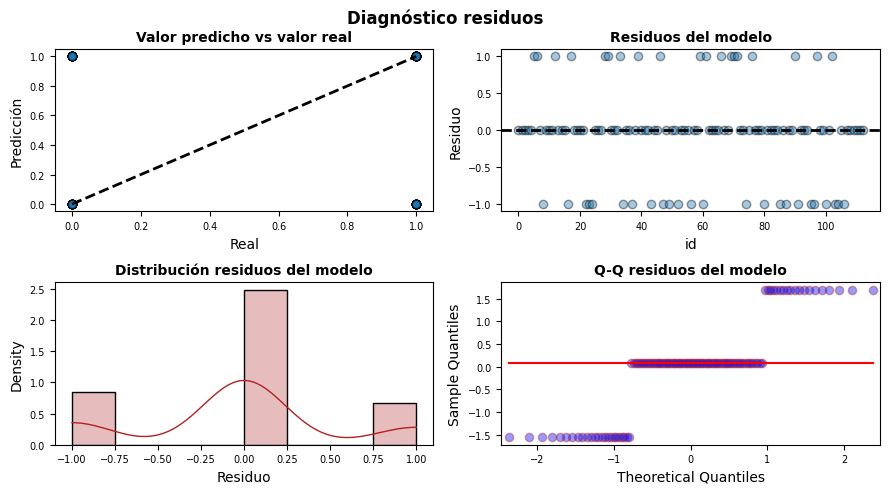

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('f1', 'accuracy'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,0.028346,0.011291,0.590909,0.930693,0.526316,0.906667
1,0.023974,0.008518,0.680851,0.901961,0.605263,0.866667
2,0.023621,0.008547,0.730769,0.928571,0.621622,0.921053
3,0.022183,0.008594,0.545455,0.960000,0.473684,0.946667
4,0.023186,0.008485,0.652174,0.911111,0.578947,0.893333
5,0.024984,0.008845,0.716981,0.866667,0.594595,0.842105
6,0.024261,0.009274,0.708333,0.927835,0.631579,0.906667
7,0.023232,0.009269,0.622222,0.933333,0.552632,0.920000
8,0.033479,0.012151,0.590909,0.886598,0.513514,0.855263
9,0.024091,0.008313,0.740741,0.916667,0.631579,0.893333


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


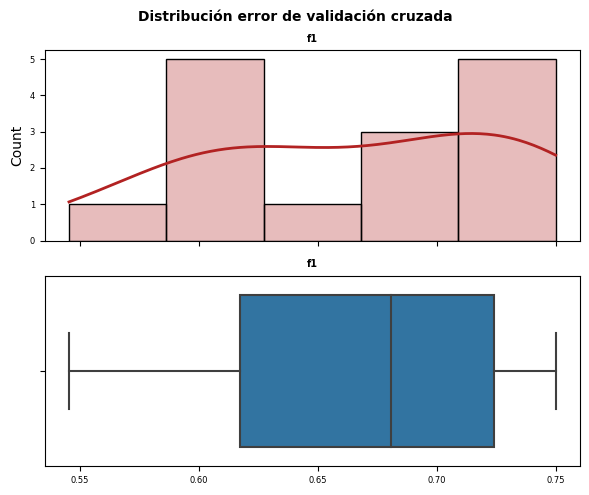

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_f1'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('f1', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_f1'],
    ax      = axes[1]
)
axes[1].set_title('f1', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

##Prediccion

In [ ]:
predicciones = pipe.predict(X_test)
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'acute_GvHD_II_III_IV' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,acute_GvHD_II_III_IV,prediccion
126,1,1
45,1,1
155,0,1
183,0,1
94,0,0


##Error de test

In [ ]:
# fbeta_score
# ==============================================================================
from sklearn.metrics import fbeta_score

fbeta = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )
fbeta

0.8983739837398373

## Decision Tree

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', DecisionTreeClassifier())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

0.6896551724137931
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.76      0.72      0.74        18

    accuracy                           0.69        29
   macro avg       0.67      0.68      0.68        29
weighted avg       0.70      0.69      0.69        29

[[ 7  4]
 [ 5 13]]


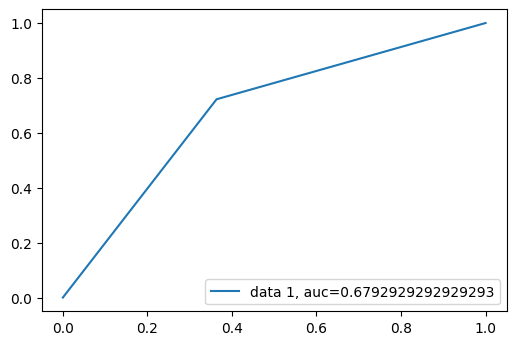

Text(0.5, 357.55555555555554, 'Predicted label')

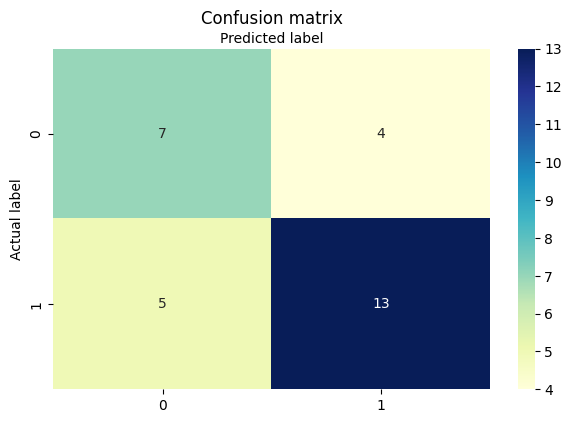

In [ ]:
y_pred = pipe.predict(X_test)
score=pipe.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Validacion

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'f1',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: 0.6431924509958565


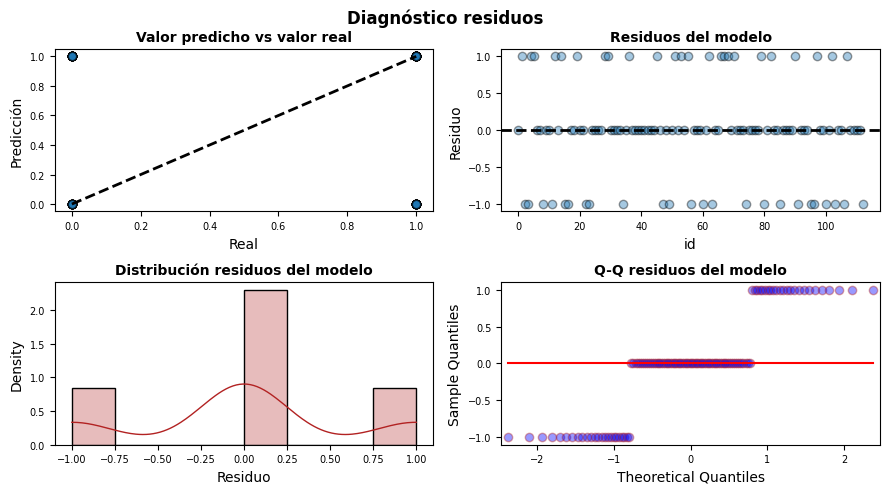

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('f1', 'accuracy'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,0.023741,0.012556,0.622222,1.0,0.552632,1.0
1,0.014192,0.008274,0.666667,1.0,0.578947,1.0
2,0.013942,0.008207,0.734694,1.0,0.648649,1.0
3,0.013489,0.010871,0.511628,1.0,0.447368,1.0
4,0.013523,0.009444,0.692308,1.0,0.578947,1.0
5,0.018563,0.014221,0.755556,1.0,0.702703,1.0
6,0.013690,0.008188,0.708333,1.0,0.631579,1.0
7,0.013359,0.008163,0.651163,1.0,0.605263,1.0
8,0.013477,0.008081,0.727273,1.0,0.675676,1.0
9,0.013364,0.008336,0.730769,1.0,0.631579,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


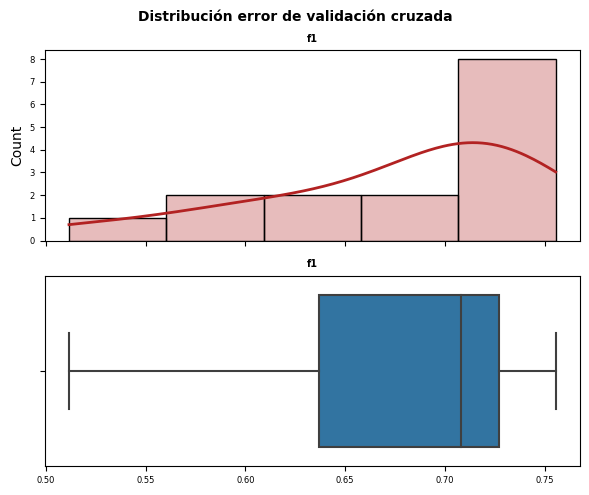

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_f1'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('f1', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_f1'],
    ax      = axes[1]
)
axes[1].set_title('f1', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

##Prediccion

In [ ]:
predicciones = pipe.predict(X_test)
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'acute_GvHD_II_III_IV' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,acute_GvHD_II_III_IV,prediccion
126,1,0
45,1,0
155,0,1
183,0,0
94,0,0


##Error de test

In [ ]:
# fbeta_score
# ==============================================================================
from sklearn.metrics import fbeta_score

fbeta = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )
fbeta

0.7347826086956523

## Adaboost

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', AdaBoostClassifier())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

0.7931034482758621
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.80      0.89      0.84        18

    accuracy                           0.79        29
   macro avg       0.79      0.76      0.77        29
weighted avg       0.79      0.79      0.79        29

[[ 7  4]
 [ 2 16]]


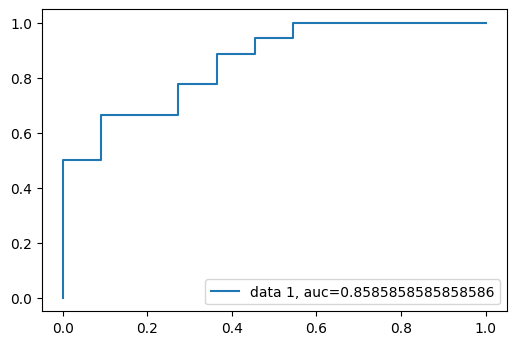

Text(0.5, 357.55555555555554, 'Predicted label')

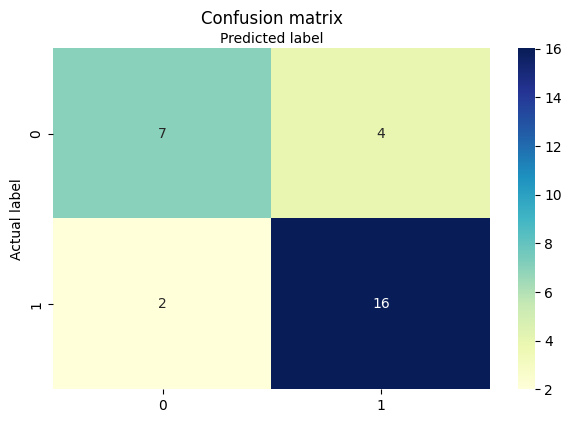

In [ ]:
y_pred = pipe.predict(X_test)
score=pipe.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Validacion

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'f1',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: 0.6753838169054887


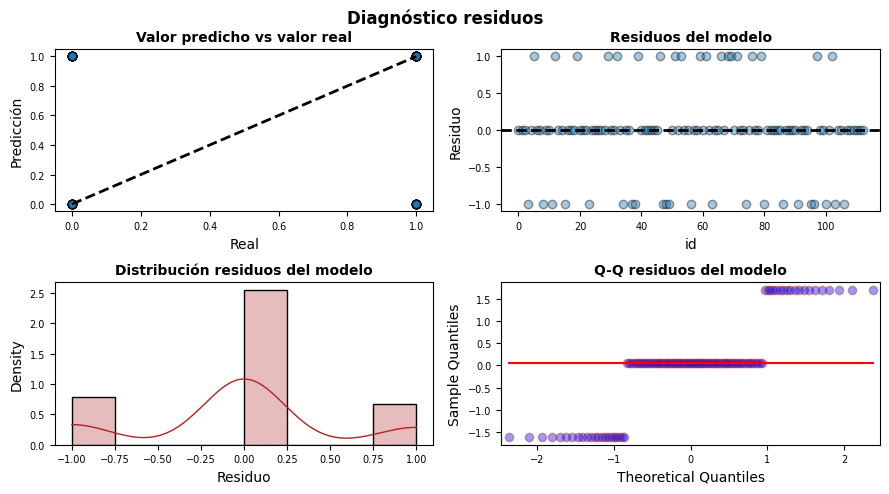

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('f1', 'accuracy'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,0.105205,0.016672,0.622222,1.0,0.552632,1.0
1,0.082628,0.015197,0.720000,1.0,0.631579,1.0
2,0.088785,0.015932,0.653846,1.0,0.513514,1.0
3,0.084414,0.016721,0.619048,1.0,0.578947,1.0
4,0.084042,0.015429,0.775510,1.0,0.710526,1.0
5,0.084504,0.014834,0.836364,1.0,0.756757,1.0
6,0.081676,0.015283,0.745098,1.0,0.657895,1.0
7,0.079049,0.019985,0.695652,1.0,0.631579,1.0
8,0.082805,0.015571,0.578947,1.0,0.567568,1.0
9,0.083439,0.014838,0.640000,1.0,0.526316,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


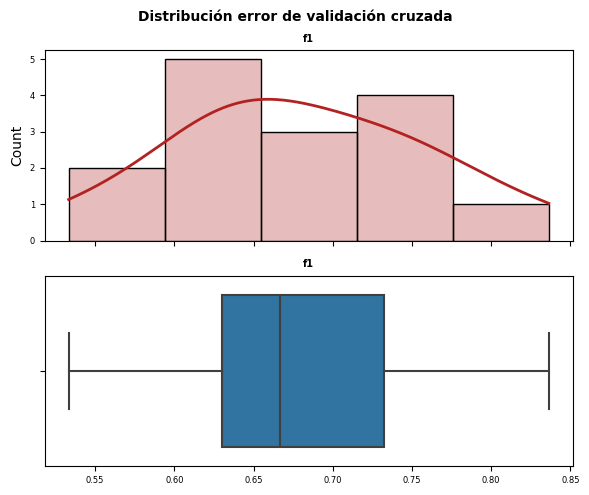

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_f1'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('f1', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_f1'],
    ax      = axes[1]
)
axes[1].set_title('f1', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

##Prediccion

In [ ]:
predicciones = pipe.predict(X_test)
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'acute_GvHD_II_III_IV' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,acute_GvHD_II_III_IV,prediccion
126,1,0
45,1,1
155,0,1
183,0,0
94,0,0


##Error de test

In [ ]:
# fbeta_score
# ==============================================================================
from sklearn.metrics import fbeta_score

fbeta = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )
fbeta

0.8595041322314048

#Comparacion entre los modelos

##Adaboost

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', AdaBoostClassifier())])


param_distributions = {
    'modelo__n_estimators': [10, 30,50, 60, 75, 95],
    'modelo__learning_rate': [0.25,0.5,0.75,1.],
    
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'f1',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__learning_rate,mean_test_score,std_test_score,mean_train_score,std_train_score
14,50,0.75,0.695052,0.091245,1.0,0.0


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
fbeta_adb = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )

print(f"El error (fbeta) de test es: {fbeta_adb}")

El error (fbeta) de test es: 0.8983739837398373


## Decision Tree

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', DecisionTreeClassifier())])

param_distributions = {
    'modelo__max_depth': [3, 4, 5, 6, 7,8, 9, 10, 12, None],
    'modelo__max_features': [1,2,3,4,5,6,7,8,9,'sqrt','log2',None],
    'modelo__criterion': ['gini','entropy','log_loss'],
    'modelo__min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'modelo__splitter':['best','random']
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.654527   -0.6484155  -0.68074003 -0.66146238         nan         nan
         nan         nan -0.67169102         nan -0.65592573         nan
 -0.68855242 -0.66072887         nan -0.68625891         nan -0.64803563
 -0.65115329 -0.65065095]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [-0.23590445 -0.44157656 -0.55899618 -0.47956828         nan         nan
         nan         nan -0.51142401         nan -0.55214065         nan
 -0.48234469 -0.54990274         nan -0.46914012         nan -0.55312854
 -0.56097682 -0.56307993]
  warnings.warn(


,param_modelo__splitter,param_modelo__min_samples_leaf,param_modelo__max_features,param_modelo__max_depth,param_modelo__criterion,mean_test_score,std_test_score,mean_train_score,std_train_score
17,random,2,7,3,gini,-0.648036,0.066513,-0.553129,0.028516


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
fbeta_dt = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )

print(f"El error (fbeta) de test es: {fbeta_dt}")

El error (fbeta) de test es: 0.7703703703703703


## Logistic Regression

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', LogisticRegression())])


# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    #'modelo__n_estimators': [10, 30,50, 60, 75, 95],
    #'modelo__max_features': ["auto", 3, 5, 7, 9, 12, 16, 20],
    'modelo__penalty':['none', 'l1', 'l2', 'elasticnet'],
    'modelo__C':[0.5,1,5,10,15,20],
    'modelo__solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'f1',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

,param_modelo__solver,param_modelo__penalty,param_modelo__C,mean_test_score,std_test_score,mean_train_score,std_train_score
13,newton-cg,none,0.5,0.668299,0.07613,0.990303,0.024723


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
fbeta_lg = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )

print(f"El error (fbeta) de test es: {fbeta_lg}")

El error (fbeta) de test es: 0.9132231404958677


## XGBoost

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', xgb.XGBClassifier())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [10, 30,50, 60, 75, 95],
    'modelo__max_features': ["auto", 3, 5, 7, 9, 12, 16, 20],
    'modelo__max_depth'   : [None, 3, 5, 10, 20, 30, 40]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'f1',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.64299869 0.6358817  0.63837176 0.6358817  0.6446115  0.64126034
 0.6452743  0.61520618 0.63837176        nan 0.61520618 0.64075991
 0.64075991 0.63837176        nan 0.6446115         nan 0.6452743
 0.6336807  0.6342829 ]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [1.         1.         0.98028761 1.         1.         0.99941003
 1.         0.87287158 0.98028761        nan 0.87287158 1.
 1.         0.98028761        nan 1.                nan 1.
 0.95992076 0.99819781]
  warnings.warn(


,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
17,75,7,10,0.645274,0.090379,1.0,0.0


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
fbeta_xgb = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )

print(f"El error (fbeta) de test es: {fbeta_xgb}")


El error (fbeta) de test es: 0.8057851239669421


## Gradient boosting classifier

In [ ]:
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingClassifier())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [10, 30,50, 60, 75, 95],
    'modelo__max_features': ["auto", 3, 5, 7, 9, 12, 16, 20],
    'modelo__max_depth'   : [None, 3, 5, 10, 20, 30, 40]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'f1',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
10,10,9,3,0.718238,0.060113,0.88582,0.020205


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
fbeta_gbc = fbeta_score(
        y_true = y_test,
        y_pred = predicciones,
        beta=1.5
       )

print(f"El error (fbeta) de test es: {fbeta_gbc}")

El error (fbeta) de test es: 0.841726618705036


## Comparacion de los errores en test

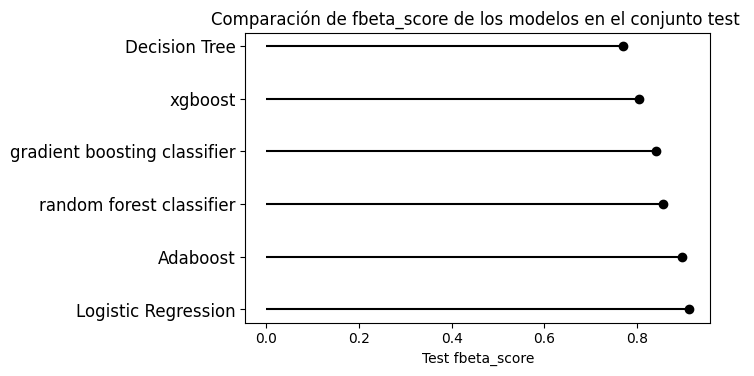

In [ ]:
error_modelos = pd.DataFrame({
                        'modelo': ['xgboost', 'random forest classifier', 'gradient boosting classifier', 'Logistic Regression', 'Adaboost','Decision Tree'],
                        'fbeta_score': [fbeta_xgb, fbeta_rf, fbeta_gbc,fbeta_lg,fbeta_adb,fbeta_dt]
                     })
error_modelos = error_modelos.sort_values('fbeta_score', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.fbeta_score)
ax.plot(error_modelos.fbeta_score, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de fbeta_score de los modelos en el conjunto test '),
ax.set_xlabel('Test fbeta_score');